In [110]:
import yfinance as yf
import keras.backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
import talib

In [111]:
data=yf.download("0700.hk")

[*********************100%***********************]  1 of 1 completed


In [112]:
df = data
#Create one more column Prediction shifted 15 days up.
df['Prediction'] = data[['Close']].shift(-1)
#print data set
df=df.dropna()
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-06-16    0.875000    0.925000    0.815000    0.830000    0.802119   
2004-06-17    0.830000    0.875000    0.825000    0.845000    0.816615   
2004-06-18    0.840000    0.850000    0.790000    0.805000    0.777959   
2004-06-21    0.820000    0.825000    0.790000    0.800000    0.773127   
2004-06-22    0.800000    0.800000    0.800000    0.800000    0.773127   
...                ...         ...         ...         ...         ...   
2021-12-23  454.000000  468.799988  449.200012  461.799988  461.799988   
2021-12-24  460.799988  460.799988  460.799988  460.799988  460.799988   
2021-12-28  457.799988  459.200012  445.000000  450.399994  450.399994   
2021-12-29  443.600006  445.600006  440.399994  444.799988  444.799988   
2021-12-30  446.399994  450.799988  442.000000  443.399994  443.399994   

                Volume  Prediction  


In [113]:
#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(df.drop(['Prediction'],1))
# scaler=MinMaxScaler(feature_range=(-1,1))
# X=scaler.fit_transform(X)
#Remove the last 15 rows
x_unseen=X[-100:]
X = X[:-100]
print(X.shape)
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df['Prediction'])
# Remove Last 15 rows
y_unseen=y[-100:]
y = y[:-100]
print(X)

(4238, 6)
[[8.75000000e-01 9.25000012e-01 8.14999998e-01 8.29999983e-01
  8.02119076e-01 2.19887500e+09]
 [8.29999983e-01 8.75000000e-01 8.24999988e-01 8.45000029e-01
  8.16615283e-01 4.19007500e+08]
 [8.39999974e-01 8.50000024e-01 7.90000021e-01 8.05000007e-01
  7.77958870e-01 1.82990000e+08]
 ...
 [4.68799988e+02 4.68799988e+02 4.23600006e+02 4.46000000e+02
  4.46000000e+02 1.17812591e+08]
 [4.35000000e+02 4.69799988e+02 4.34000000e+02 4.56799988e+02
  4.56799988e+02 4.61034780e+07]
 [4.52600006e+02 4.64399994e+02 4.32600006e+02 4.39000000e+02
  4.39000000e+02 5.86259390e+07]]


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_1526/893241783.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))


In [114]:
# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [115]:
regr=make_pipeline(MinMaxScaler(),RandomForestRegressor())
regr.fit(x_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [116]:
y_pred=regr.predict(x_test)

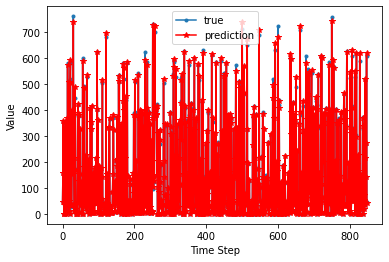

In [117]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [118]:
mean_absolute_percentage_error(y_test,y_pred)

0.021237398872913982

In [119]:
r2_score(y_test,y_pred)

0.9989247202318043

In [120]:
mean_squared_error(y_test,y_pred,squared=True)

36.623533721157735

In [121]:
unseend_pred = regr.predict(x_unseen)

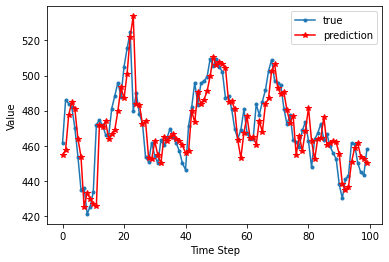

In [122]:
plt.plot(y_unseen, marker='.', label="true")
plt.plot(unseend_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [123]:
mean_absolute_percentage_error(y_unseen,unseend_pred)

0.020242796612971157

In [124]:
r2_score(y_unseen,unseend_pred)

0.6435882879610686

In [125]:
mean_squared_error(y_unseen,unseend_pred,squared=True)

157.38989606895555